In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from naive_bayes import NaiveBayes

# Preprocessing

In [2]:
train, test = pd.read_csv('train.csv'), pd.read_csv('test.csv')
df = pd.concat([train, test])

# Zmiana wieku z cechy numerycznej na kategoryczną
bins = [0, 20, 40, 60, float('inf')]
labels = [0, 1, 2, 3]
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Mapowanie nazw płci na wartości 0 - mężczyzna, 1 - kokbieta 
df['SexFactorized'] = pd.factorize(df['Sex'])[0]

# Mapowanie cechy Embarked na wartosci numeryczne
df['EmbarkedFactorize'] = pd.factorize(df['Embarked'])[0]

# Wybór 5 cech na podstawie których trenowany będzie klasyfikator
final_df = df[['Survived', 'Pclass', 'SexFactorized', 'Age', 'Parch', 'EmbarkedFactorize']]

# Podział na zbiór treningowy i testowy
train, test = final_df[:len(train)], final_df[len(train):]
split = int(0.8 * len(train))
train, validation = train[:split], train[split:]

X_train, y_train = train.drop(columns=['Survived']).values, train['Survived'].values
X_val, y_val = validation.drop(columns=['Survived']).values, validation['Survived'].values

print('Train set size: ', len(X_train))
print('Validation set size: ', len(X_val))

Train set size:  712
Validation set size:  179


# Trenowanie klasyfikatora

In [3]:
nb = NaiveBayes()
nb.fit(X_train, y_train)

## Rezultat na zbiorze treningowym

Accuracy: 78.51%


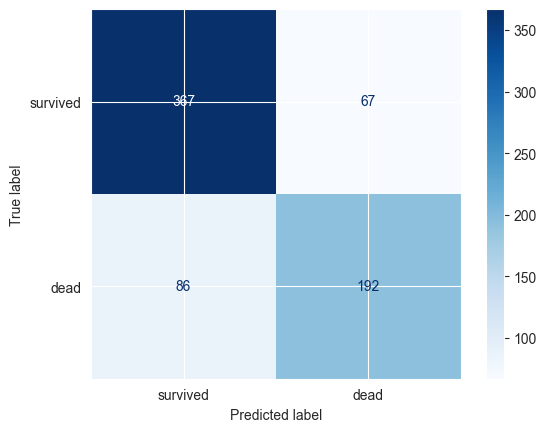

In [4]:
y_pred = nb.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['survived', 'dead'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Rezultat na zbiorze testowym

Accuracy: 79.89%


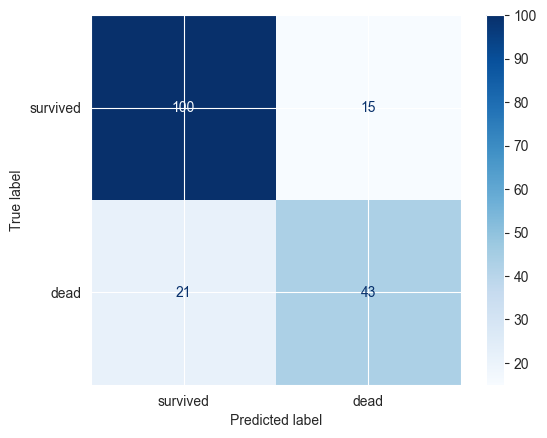

In [5]:
y_pred = nb.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['survived', 'dead'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### W celu oceny jakości klasyfikatora odseparowalśmy od zbioru treningowego zbiór walidacyjny, na obu zbiorach klasyfikator osiąga dokładność rzędu ~80%, w związku z czym można wywnioskować że nie występuje ani przeuczenie, ani niedouczenie, klasyfikator jest wytrenowany optymalnie dla podanego zbioru cech.

## Prawdopodobieństwo przżycia osoby pod warnukiem że:

In [6]:
survival_prob = final_df['Survived'].sum() / len(final_df)
print(f'Prawdopodobieństow przeżycia: {round(survival_prob, 2)}')

Prawdopodobieństow przeżycia: 0.26


### A) Była mężczyzną

In [7]:
prob_con = len(final_df.loc[(df['SexFactorized'] == 0) & (df['Survived'] == 1)]) / len(final_df)
prob = prob_con / survival_prob
print(f'Prawdopodobieństwo: {prob}')

Prawdopodobieństwo: 0.31871345029239767


### B) Była kobietą

In [8]:
prob_con = len(final_df.loc[(df['SexFactorized'] == 1) & (df['Survived'] == 1)]) / len(final_df)
prob = prob_con / survival_prob
print(f'Prawdopodobieństwo: {prob}')

Prawdopodobieństwo: 0.6812865497076024


### C) Była chłopcem

In [9]:
prob_con = len(final_df.loc[(df['SexFactorized'] == 0) & (df['Survived'] == 1) & (df['Age'] == 0)]) / len(final_df)
prob = prob_con / survival_prob
print(f'Prawdopodobieństwo: {prob}')

Prawdopodobieństwo: 0.07602339181286549


### D) Była dziewczynką

In [10]:
prob_con = len(final_df.loc[(df['SexFactorized'] == 1) & (df['Survived'] == 1) & (df['Age'] == 0)]) / len(final_df)
prob = prob_con / survival_prob
print(f'Prawdopodobieństwo: {prob}')

Prawdopodobieństwo: 0.15497076023391812
